In [2]:
import pandas as pd
import numpy as np
import PIL
import os
import json
import cv2
import os
import numpy as np
from collections import Counter
import shutil
import sklearn
import sklearn.metrics as metrics
import pytesseract
from matplotlib.pyplot import imshow
%matplotlib inline

# Simple CNN model for CIFAR-10
import keras
from keras.layers import Dense,Dropout,Flatten, Activation,Conv1D,MaxPooling1D,LSTM,Embedding,Input,Conv2D
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.models import Model
from keras.preprocessing import sequence
from keras import backend as K

import keras_metrics
K.common.set_image_dim_ordering('th')
import tensorflow as tf
# Plot ad hoc CIFAR10 instances
from keras.datasets import cifar10
from matplotlib import pyplot
#import scipy.misc.toimage 
from PIL import Image


def as_keras_metric(method):
    import functools
    from keras import backend as K
    import tensorflow as tf
    @functools.wraps(method)
    def wrapper(self, args, **kwargs):
        """ Wrapper for turning tensorflow metrics into keras metrics """
        value, update_op = method(self, args, **kwargs)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([update_op]):
            value = tf.identity(value)
        return value
    return wrapper

@as_keras_metric
def auc_pr(y_true, y_pred, curve='PR'):
    return tf.metrics.auc(y_true, y_pred, curve=curve)

# load data
#(X_train, y_train), (X_test, y_test) = cifar10.load_data()
from IPython.display import Image

Using TensorFlow backend.


Stages of Optical Character Recognition


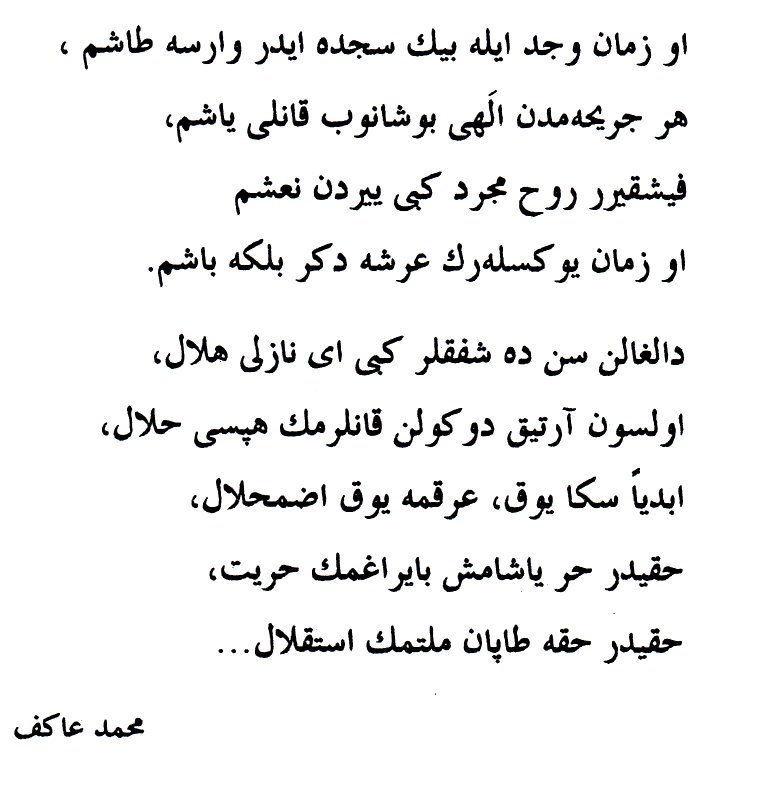

In [3]:
print("Stages of Optical Character Recognition")
Image(filename='/home/furkan/Desktop/Models/osmanlica5.jpg')

In [7]:
file =  r'/home/furkan/Desktop/Models/osmanlica5.jpg'
#file = r'output2/sample.jpg'
image = PIL.Image.open(file)
text = pytesseract.image_to_string(image,'ara')
text=text.split()
print(text)
print(len(text[2]))

['او', 'زمان', 'وجد', 'ايله', 'بيك', 'سجذه', 'ايدر', 'وارسه', 'طاشم', '2', 'هر', 'جريحهمدن', 'الَهى', 'بوشانوب', 'قانلى', 'ياشمء', 'فيشقيرر', 'روح', 'مجرد', 'كى', 'ييردن', 'نعشم', 'دالغالن', 'سن', 'ده', 'شفقلر', 'كى', 'اى', 'نازلى', 'هلال»', 'اولسون', 'آرتيق', 'دوكولن', 'قانلرمك', 'هبسى', 'حلال»', 'ابدياً', 'سكا', 'يوق»', 'عرقمه', 'يوق', 'اضمحلال»', 'حقيدر', 'حر', 'ياشامش', 'بايراغمك', 'حريت,', 'حقيدر', 'حقه', 'طايان', 'ملتمك', 'استقلال...', 'محمد', 'عاكف']
3


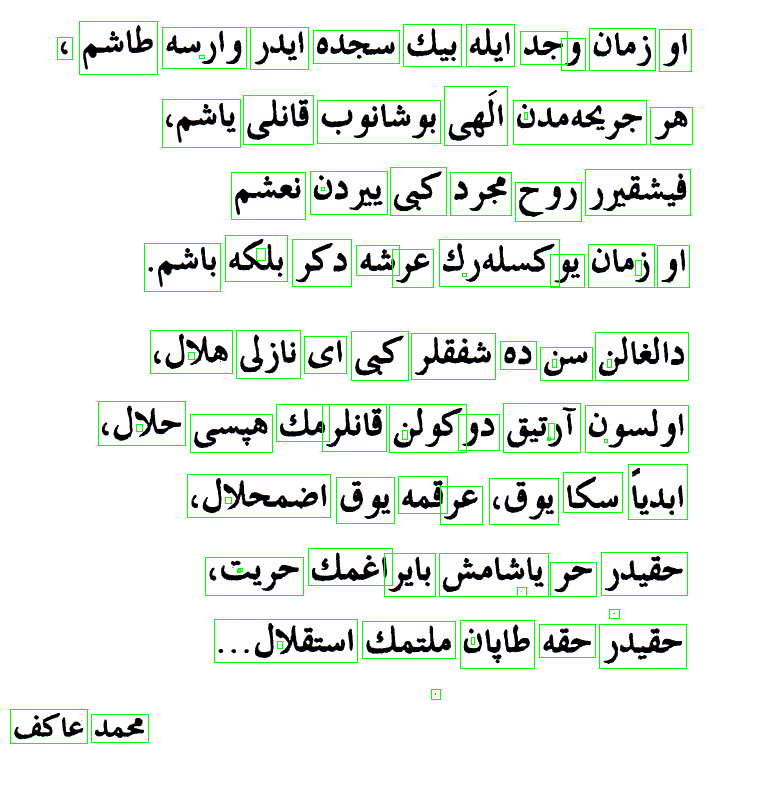

In [5]:
file =  r'/home/furkan/Desktop/Models/osmanlica5.jpg'

im1 = cv2.imread(file, 0)
im = cv2.imread(file)

ret,thresh1 = cv2.threshold(im1,180,255,cv2.THRESH_BINARY_INV)
kernel = np.ones((5,5),np.uint8)
dilated = cv2.dilate(thresh1,kernel,iterations = 2)
contours, hierarchy = cv2.findContours(dilated,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cordinates = []
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cordinates.append((x,y,w,h))
    #bound the images
    cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),1)

#cv2.namedWindow('osmanlica22', cv2.WINDOW_NORMAL)
cv2.imwrite('/home/furkan/Desktop/Models/osmanlica51.png',im)

from IPython.display import Image
Image(filename='/home/furkan/Desktop/Models/osmanlica51.png',width=800,height=400)

In [6]:
import pickle

In [7]:
# open a file, where you ant to store the data
file = open('/home/furkan/Desktop/Models/cord/Cordinates6', 'wb')
# dump information to that file
pickle.dump(cordinates, file)
# close the file
file.close()

In [8]:
count = 0
for component in zip(contours, hierarchy[0]):
    currentContour = component[0]
    currentHierarchy = component[1]
    x,y,w,h = cv2.boundingRect(currentContour)
    if currentHierarchy[3] <= 0:
        # these are the outermost parent components
        cv2.rectangle(im,(x,y),(x+w,y+h),(0,0,128),1)
        count = count + 1
        letter = im[y:y+h,x:x+w]
        # Create a folder of output to store each cropped letter image
        cv2.imwrite('/home/furkan/Desktop/Models/words/l-{}.jpg'.format(count),letter)
#     elif currentHierarchy[2] < 0:
#         # these are the innermost child components
#         cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)

# Finally show the image
cv2.imwrite('img5.jpg',im)
print(count)

71


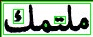

In [9]:
im1 = cv2.imread('/home/furkan/Desktop/Models/words/l-6.jpg',0)
im = cv2.imread('/home/furkan/Desktop/Models/words/l-6.jpg')

ret,thresh1 = cv2.threshold(im1,180,278,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),1)
i=0
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    if w>100 and h>100:
        #save individual images
        cv2.imwrite(str(i)+".jpg",thresh1[y:y+h,x:x+w])
        i=i+1
#cv2.namedWindow('osmanlica22', cv2.WINDOW_NORMAL)
cv2.imwrite('/home/furkan/Desktop/Models/changeWords/l-6.jpg',im)
from IPython.display import Image
Image(filename='/home/furkan/Desktop/Models/changeWords/l-6.jpg',width=400,height=200)

In [10]:
# read the image and get the dimensions
img = cv2.imread('/home/furkan/Desktop/Models/changeWords/l-1.jpg')
h, w,_= img.shape # assumes color image

# run tesseract, returning the bounding boxes
boxes = pytesseract.image_to_boxes(img).split('\n') # also include any config options you use
# Box = list(map(lambda box:(box[:1],list(map(int,box[2:][:-2].split(' ')))),boxes))

# draw the bounding boxes on the image
for b in boxes:
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
# show annotated image and wait for keypress
# cv2.imshow(files[0], img)

cv2.imwrite('/home/furkan/Desktop/Models/changeWords/changedl-1.jpg',img)

from IPython.display import Image
Image(filename='/home/furkan/Desktop/Models/changeWords/changedl-1.jpg',width=800,height=400)

IndexError: list index out of range